In [1]:
import getpass
import datetime
from datetime import date, timedelta, datetime, time
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.dates as mdates
import os
import csv
import pandas as pd

# import mplcursors

USER = getpass.getuser()

In [2]:
plt.rcParams['figure.figsize'] = [8, 5]
%matplotlib notebook

In [289]:
data_dir = pd.read_excel (r"temp_data1.xlsx")

df = pd.DataFrame(data_dir)
dn = df.to_numpy()
exmatrix = np.matrix(dn)


In [286]:
data_dir = pd.read_excel (r"temp_data.xlsx")

df = pd.DataFrame(data_dir)
dn = df.to_numpy()
exmatrix = np.matrix(dn)

lm_1_rf_list = []
lm_1_zynq_list = []
lm_1_batt_list = []

for x in range(0,799):
    s1 = (datetime.strptime(exmatrix[x,2], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[x,2], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[x,2], '%m/%d/%Y %H:%M:%S').second
    s2 = (datetime.strptime(exmatrix[(x+1),2], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[(x+1),2], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[(x+1),2], '%m/%d/%Y %H:%M:%S').second
    dt = s2-s1
    
    down_point_1 = exmatrix[x,15]
    down_point_2 = exmatrix[x,16]
    down_point_3 = exmatrix[x,17]

    up_point_1 = exmatrix[(x+1),15]
    up_point_2 = exmatrix[(x+1),16]
    up_point_3 = exmatrix[(x+1),17]

    p_dif_1 = up_point_1 - down_point_1
    p_dif_2 = up_point_2 - down_point_2
    p_dif_3 = up_point_3 - down_point_3

    intv_1 = p_dif_1/dt
    intv_2 = p_dif_2/dt
    intv_3 = p_dif_3/dt
    
    upsample_array_1 = []
    upsample_array_2 = []
    upsample_array_3 = []
    for y in range(0,dt):
        inc_1 = down_point_1 + y*intv_1
        inc_2 = down_point_2 + y*intv_2
        inc_3 = down_point_3 + y*intv_3
        
        upsample_array_1.append(inc_1)
        upsample_array_2.append(inc_2)
        upsample_array_3.append(inc_3)
      
    lm_1_rf_list = lm_1_rf_list + upsample_array_1
    lm_1_zynq_list = lm_1_zynq_list + upsample_array_2
    lm_1_batt_list = lm_1_batt_list + upsample_array_3

lm_2_rf_list = []
lm_2_zynq_list = []
lm_2_batt_list = []

for x in range(0,1032):
    s1 = (datetime.strptime(exmatrix[x,3], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[x,3], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[x,3], '%m/%d/%Y %H:%M:%S').second
    s2 = (datetime.strptime(exmatrix[(x+1),3], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[(x+1),3], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[(x+1),3], '%m/%d/%Y %H:%M:%S').second
    dt = s2-s1
    
    down_point_1 = exmatrix[x,18]
    down_point_2 = exmatrix[x,19]
    down_point_3 = exmatrix[x,20]

    up_point_1 = exmatrix[(x+1),18]
    up_point_2 = exmatrix[(x+1),19]
    up_point_3 = exmatrix[(x+1),20]

    p_dif_1 = up_point_1 - down_point_1
    p_dif_2 = up_point_2 - down_point_2
    p_dif_3 = up_point_3 - down_point_3

    intv_1 = p_dif_1/dt
    intv_2 = p_dif_2/dt
    intv_3 = p_dif_3/dt
    
    upsample_array_1 = []
    upsample_array_2 = []
    upsample_array_3 = []
    for y in range(0,dt):
        inc_1 = down_point_1 + y*intv_1
        inc_2 = down_point_2 + y*intv_2
        inc_3 = down_point_3 + y*intv_3
        
        upsample_array_1.append(inc_1)
        upsample_array_2.append(inc_2)
        upsample_array_3.append(inc_3)
              
    lm_2_rf_list = lm_2_rf_list + upsample_array_1
    lm_2_zynq_list = lm_2_zynq_list + upsample_array_2
    lm_2_batt_list = lm_2_batt_list + upsample_array_3

   
lm_1_amb_in_list = []
lm_1_encl_list = []
lm_2_amb_in_list = []
lm_2_encl_list = []

for x in range(0,273):
    s1 = (datetime.strptime(exmatrix[x,1], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[x,1], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[x,1], '%m/%d/%Y %H:%M:%S').second
    s2 = (datetime.strptime(exmatrix[(x+1),1], '%m/%d/%Y %H:%M:%S').hour * 60 + datetime.strptime(exmatrix[(x+1),1], '%m/%d/%Y %H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[(x+1),1], '%m/%d/%Y %H:%M:%S').second
    dt = s2-s1
    
    down_point_1 = exmatrix[x,11]
    down_point_2 = exmatrix[x,12]
    down_point_3 = exmatrix[x,13]
    down_point_4 = exmatrix[x,14]

    up_point_1 = exmatrix[(x+1),11]
    up_point_2 = exmatrix[(x+1),12]
    up_point_3 = exmatrix[(x+1),13]
    up_point_4 = exmatrix[(x+1),14]

    p_dif_1 = up_point_1 - down_point_1
    p_dif_2 = up_point_2 - down_point_2
    p_dif_3 = up_point_3 - down_point_3
    p_dif_4 = up_point_4 - down_point_4

    intv_1 = p_dif_1/dt
    intv_2 = p_dif_2/dt
    intv_3 = p_dif_3/dt
    intv_4 = p_dif_4/dt

    upsample_array_1 = []
    upsample_array_2 = []
    upsample_array_3 = []
    upsample_array_4 = []
    for y in range(0,dt):
        inc_1 = down_point_1 + y*intv_1
        inc_2 = down_point_2 + y*intv_2
        inc_3 = down_point_3 + y*intv_3
        inc_4 = down_point_4 + y*intv_4

        upsample_array_1.append(inc_1)
        upsample_array_2.append(inc_2)
        upsample_array_3.append(inc_3)
        upsample_array_4.append(inc_4)

    lm_1_amb_in_list = lm_1_amb_in_list + upsample_array_1
    lm_1_encl_list = lm_1_encl_list + upsample_array_2
    lm_2_amb_in_list = lm_2_amb_in_list + upsample_array_3
    lm_2_encl_list = lm_2_encl_list + upsample_array_4

solar_radiation_list = []
solar_radiation_time_list = []
for x in range(0,17):
    s1 = (datetime.strptime(exmatrix[(x+25),0], '%H:%M:%S').hour * 60 + datetime.strptime(exmatrix[(x+25),0], '%H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[(x+25),0], '%H:%M:%S').second
    s2 = (datetime.strptime(exmatrix[(x+26),0], '%H:%M:%S').hour * 60 + datetime.strptime(exmatrix[(x+26),0], '%H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[(x+26),0], '%H:%M:%S').second
    dt = s2-s1
    
    down_point_1 = exmatrix[(x+25),10]
#     down_point_2 = exmatrix[x,11]
#     down_point_3 = exmatrix[x,12]
#     down_point_4 = exmatrix[x,13]

    up_point_1 = exmatrix[(x+26),10]
#     up_point_2 = exmatrix[(x+1),11]
#     up_point_3 = exmatrix[(x+1),12]
#     up_point_4 = exmatrix[(x+1),13]

    p_dif_1 = up_point_1 - down_point_1
#     p_dif_2 = up_point_2 - down_point_2
#     p_dif_3 = up_point_3 - down_point_3
#     p_dif_4 = up_point_4 - down_point_4

    intv_1 = p_dif_1/dt
#     intv_2 = p_dif_2/dt
#     intv_3 = p_dif_3/dt
#     intv_4 = p_dif_4/dt

    upsample_array_1 = []
#     upsample_array_2 = []
#     upsample_array_3 = []
#     upsample_array_4 = []
    for y in range(0,dt):
        inc_1 = down_point_1 + y*intv_1
#         inc_2 = down_point_2 + y*intv_2
#         inc_3 = down_point_3 + y*intv_3
#         inc_4 = down_point_4 + y*intv_4

        upsample_array_1.append(inc_1)
#         upsample_array_2.append(inc_2)
#         upsample_array_3.append(inc_3)
#         upsample_array_4.append(inc_4)

    solar_radiation_list = solar_radiation_list + upsample_array_1
   

In [299]:
times = np.arange('2020-08-11T00:00:00', '2020-08-11T02:30:01', dtype='datetime64[s]')  

solar_radiation_list = np.array(solar_radiation_list)

lm_1_amb_in_list = np.array(lm_1_amb_in_list)
lm_1_encl_list = np.array(lm_1_encl_list)
lm_2_amb_in_list = np.array(lm_2_amb_in_list)
lm_2_encl_list = np.array(lm_2_encl_list)

lm_2_rf_list = np.array(lm_2_rf_list)
lm_2_zynq_list = np.array(lm_2_zynq_list)
lm_2_batt_list = np.array(lm_2_batt_list)

lm_1_rf_list = np.array(lm_1_rf_list)
lm_1_zynq_list = np.array(lm_1_zynq_list)
lm_1_batt_list = np.array(lm_1_batt_list)

nan_1 = np.empty((1,np.size(times)-np.size(lm_2_rf_list)))
nan_2 = np.empty((1,np.size(times)-np.size(lm_1_rf_list)))
nan_3 = np.empty((1,np.size(times)-np.size(lm_1_amb_in_list)))
nan_1[:] = np.NaN
nan_2[:] = np.NaN
nan_3[:] = np.NaN

lm_2_rf_list = np.append(lm_2_rf_list, nan_1)
lm_2_zynq_list = np.append(lm_2_zynq_list, nan_1)
lm_2_batt_list = np.append(lm_2_batt_list, nan_1)

lm_1_rf_list = np.append(lm_1_rf_list, nan_2)
lm_1_zynq_list = np.append(lm_1_zynq_list, nan_2)
lm_1_batt_list = np.append(lm_1_batt_list, nan_2)

lm_1_amb_in_list = np.append(lm_1_amb_in_list, nan_3)
lm_1_encl_list = np.append(lm_1_encl_list, nan_3)
lm_2_amb_in_list = np.append(lm_2_amb_in_list, nan_3)
lm_2_encl_list = np.append(lm_2_encl_list, nan_3)

# time_axis = pd.read_excel(r"temp_data.xlsx", index_col=None, na_values=['NA'], usecols = "J", nrows = 8805)
# time_axis = np.array(time_axis)
# time_axis = time_axis.flatten()

# start = time(0, 0, 0)
# delta = timedelta(seconds=1)
# times = []
# n=8805

# for i in range(n):
#     # use complete datetime object, not only time
#     dt = datetime.combine(date.today(), time(0, 0)) + delta * i
#     times.append(dt)
    

# print(type(time_axis[0,0]))
# time_axis = datetime.datetime.strftime(time_axis)
# time_axis = dates.date2num(list(time_axis))
# print(np.shape(time_axis))
# print(time_axis) 
# print(type(time_axis))    
fig, ax = plt.subplots()
tim_min = min(times)
tim_max = np.datetime64('2020-08-11T02:30:00', dtype='datetime64[s]')
plt.ylabel("Degrees(℃)", fontsize = 13, fontweight = 'bold')
plt.xlabel('Time', fontsize = 13, fontweight = 'bold')
plt.title('Two LM Outdoor Temperature Test vs Solar Irradiance (08/11/2020)', fontsize = 13, fontweight = 'bold') 
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1.25', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.75', color='black')

# plt.plot(times, lm_1_encl_list, label="lm_1 encl_list", linewidth=1.5)
plt.plot(times, lm_1_rf_list, label="lm_1 rf temperature", linewidth=3)
plt.plot(times, lm_1_batt_list, label="lm_1 batt temperature", linewidth=3)
plt.plot(times, lm_1_zynq_list, label="lm_1 zynq temperature", linewidth=3)
plt.plot(times, lm_1_amb_in_list, label="lm_1 amb_in temperature",linewidth=3)
plt.plot(times, lm_2_amb_in_list, label="lm_2 amb_in temperature", linewidth=3)
plt.plot(times, lm_2_encl_list, label="lm_2 encl temperature", linewidth=3)
plt.plot(times, lm_2_rf_list, label="lm_2 rf temperature", linewidth=3)
plt.plot(times, lm_2_zynq_list, label="lm_2 zynq temperature", linewidth=3)
plt.plot(times, lm_2_batt_list, label="lm_2 batt temperature", linewidth=3)
plt.legend(bbox_to_anchor=(0.214, 0.65), loc='upper left temperature', prop={"size":9,'weight':'bold'})
plt.xticks(fontsize=11, fontweight = 'bold')
plt.yticks(fontsize=11, fontweight = 'bold')
plt.ylim(20,90)



ax2 = ax.twinx()
ax2.set_ylabel('solar irradiance(W/m2)', fontsize = 13, fontweight = 'bold')  # we already handled the x-label with ax1
ax2.plot(times, solar_radiation_list[1418:10419], color = 'black', label="theorertical solar irradiance", linewidth=3)
plt.yticks(fontsize=11, fontweight = 'bold')

pd.plotting.register_matplotlib_converters()
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))


plt.xlim(tim_min,tim_max)
# ax2.tick_params(axis='y', labelcolor=color)
# Get only the month to show in the x-axis:
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# plt.setp(ax.get_xticklabels(), rotation = 15) 
# plt.gca().xaxis.set_major_locator(mdates.HourLocator())
# plt.plot(time_axis, batt_therm_list, label="battery thermistor")
# plt.plot(time_axis, amb_in_list, label="ambient thermistor in LM")
# plt.plot(time_axis, amb_out_list, label="ambient thermistor outside LM")
# plt.plot(time_axis, rf_list, label="firmware rf readings")
# plt.plot(time_axis, batt_list, label="firmware battery readings")
# plt.plot(time_axis, zynq_list, label="firmware zynq readings")

# xlocator = time_axis.MinuteLocator(byminute=[0,15,30,45], interval = 1)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)
plt.legend(bbox_to_anchor=(0.023, 0.927), loc='upper left', prop={"size":9,'weight':'bold'})
# plt.figure(figsize=(5,10))
fig.set_size_inches(16, 10)

# plt.tight_layout()
plt.savefig("two_lm_outdoor_temperature_test_08_11_2020")


ValueError: negative dimensions are not allowed

<IPython.core.display.Javascript object>


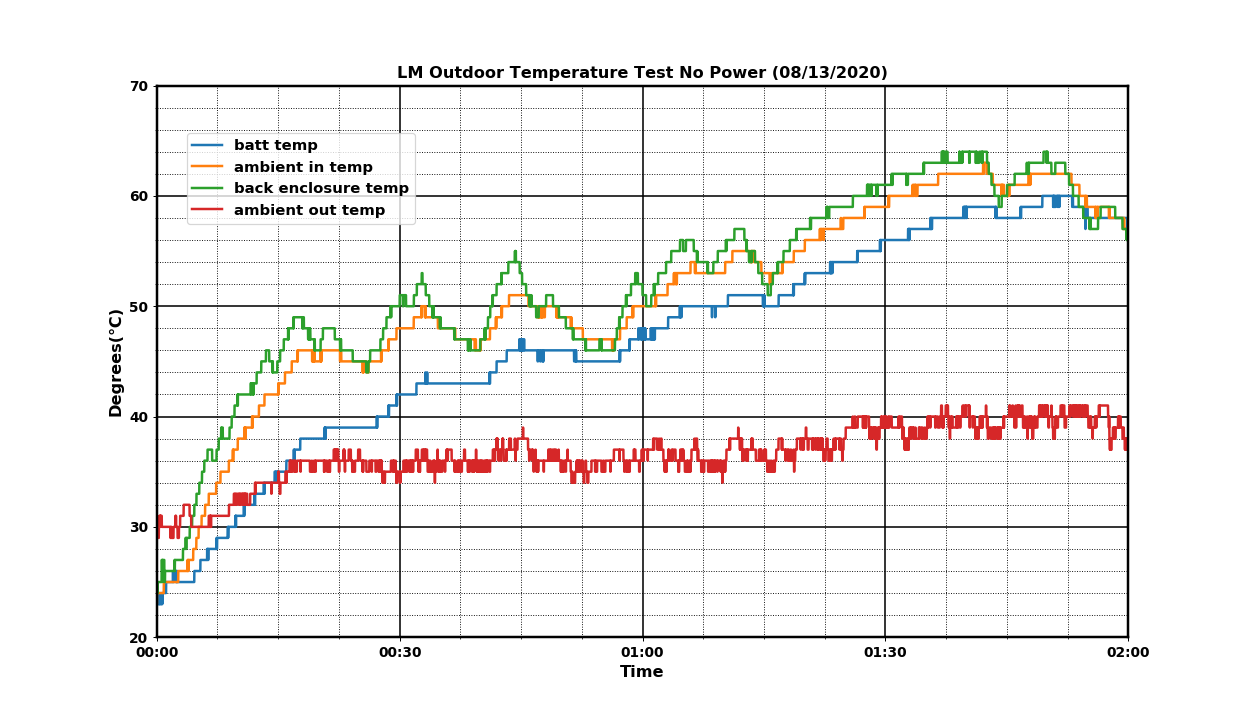

/home/alan24/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Unrecognized location 'upper left temperature'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


In [304]:
times = np.arange('2020-08-11T00:00:00', '2020-08-11T02:00:00', dtype='datetime64[s]')  

solar_radiation_list = np.array(solar_radiation_list)

lm_1_batt_list = np.array(exmatrix[:,0])
lm_1_amb_in_list = np.array(exmatrix[:,1])
lm_1_encl_list = np.array(exmatrix[:,2])
lm_1_ambi_out_list = np.array(exmatrix[:,3])

# nan_1 = np.empty((1,np.size(times)-np.size(lm_1_batt_list)))
# nan_1[:] = np.NaN

# lm_1_batt_list = np.append(lm_1_batt_list, nan_1)
# lm_1_amb_in_list = np.append(lm_1_amb_in_list, nan_1)
# lm_1_encl_list = np.append(lm_1_encl_list, nan_1)
# lm_1_ambi_out_list = np.append(lm_1_ambi_out_list, nan_1)
# time_axis = pd.read_excel(r"temp_data.xlsx", index_col=None, na_values=['NA'], usecols = "J", nrows = 8805)
# time_axis = np.array(time_axis)
# time_axis = time_axis.flatten()

# start = time(0, 0, 0)
# delta = timedelta(seconds=1)
# times = []
# n=8805

# for i in range(n):
#     # use complete datetime object, not only time
#     dt = datetime.combine(date.today(), time(0, 0)) + delta * i
#     times.append(dt)
    

# print(type(time_axis[0,0]))
# time_axis = datetime.datetime.strftime(time_axis)
# time_axis = dates.date2num(list(time_axis))
# print(np.shape(time_axis))
# print(time_axis) 
# print(type(time_axis))    
fig, ax = plt.subplots()
tim_min = min(times)
tim_max = np.datetime64('2020-08-11T02:00:00', dtype='datetime64[s]')
plt.ylabel("Degrees(℃)", fontsize = 13, fontweight = 'bold')
plt.xlabel('Time', fontsize = 13, fontweight = 'bold')
plt.title('LM Outdoor Temperature Test No Power (08/13/2020)', fontsize = 13, fontweight = 'bold') 
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1.25', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.75', color='black')

# plt.plot(times, lm_1_encl_list, label="lm_1 encl_list", linewidth=1.5)
plt.plot(times, lm_1_batt_list[0:7200], label="batt temp", linewidth=2)
plt.plot(times, lm_1_amb_in_list[0:7200], label="ambient in temp", linewidth=2)
plt.plot(times, lm_1_encl_list[0:7200], label="back enclosure temp", linewidth=2)
plt.plot(times, lm_1_ambi_out_list[0:7200], label="ambient out temp",linewidth=2)
plt.legend(bbox_to_anchor=(0.214, 0.65), loc='upper left temperature', prop={"size":15,'weight':'bold'})
plt.xticks(fontsize=11, fontweight = 'bold')
plt.yticks(fontsize=11, fontweight = 'bold')
plt.ylim(20,70)



# ax2 = ax.twinx()
# ax2.set_ylabel('solar irradiance(W/m2)', fontsize = 13, fontweight = 'bold')  # we already handled the x-label with ax1
# ax2.plot(times, solar_radiation_list[1418:10419], color = 'black', label="theorertical solar irradiance", linewidth=3)
# plt.yticks(fontsize=11, fontweight = 'bold')

pd.plotting.register_matplotlib_converters()
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))


plt.xlim(tim_min,tim_max)
# ax2.tick_params(axis='y', labelcolor=color)
# Get only the month to show in the x-axis:
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# plt.setp(ax.get_xticklabels(), rotation = 15) 
# plt.gca().xaxis.set_major_locator(mdates.HourLocator())
# plt.plot(time_axis, batt_therm_list, label="battery thermistor")
# plt.plot(time_axis, amb_in_list, label="ambient thermistor in LM")
# plt.plot(time_axis, amb_out_list, label="ambient thermistor outside LM")
# plt.plot(time_axis, rf_list, label="firmware rf readings")
# plt.plot(time_axis, batt_list, label="firmware battery readings")
# plt.plot(time_axis, zynq_list, label="firmware zynq readings")

# xlocator = time_axis.MinuteLocator(byminute=[0,15,30,45], interval = 1)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)
plt.legend(bbox_to_anchor=(0.023, 0.927), loc='upper left', prop={"size":12,'weight':'bold'})
# plt.figure(figsize=(5,10))
fig.set_size_inches(14, 8)

# plt.tight_layout()
plt.savefig("lm_outdoor_temperature_test_no_power_08_11_2020")


In [13]:
print(time_axis[1])
print(np.shape(time_axis))

00:00:02
(8805,)


In [39]:
start = time(0, 0, 0)
delta = timedelta(seconds=1)
times = []
n=8870

for i in range(n):
    # use complete datetime object, not only time
    dt = datetime.combine(date.today(), time(0, 0)) + delta * i
    times.append(dt)
    
print(times)    

[datetime.datetime(2020, 7, 31, 0, 0), datetime.datetime(2020, 7, 31, 0, 0, 1), datetime.datetime(2020, 7, 31, 0, 0, 2), datetime.datetime(2020, 7, 31, 0, 0, 3), datetime.datetime(2020, 7, 31, 0, 0, 4), datetime.datetime(2020, 7, 31, 0, 0, 5), datetime.datetime(2020, 7, 31, 0, 0, 6), datetime.datetime(2020, 7, 31, 0, 0, 7), datetime.datetime(2020, 7, 31, 0, 0, 8), datetime.datetime(2020, 7, 31, 0, 0, 9), datetime.datetime(2020, 7, 31, 0, 0, 10), datetime.datetime(2020, 7, 31, 0, 0, 11), datetime.datetime(2020, 7, 31, 0, 0, 12), datetime.datetime(2020, 7, 31, 0, 0, 13), datetime.datetime(2020, 7, 31, 0, 0, 14), datetime.datetime(2020, 7, 31, 0, 0, 15), datetime.datetime(2020, 7, 31, 0, 0, 16), datetime.datetime(2020, 7, 31, 0, 0, 17), datetime.datetime(2020, 7, 31, 0, 0, 18), datetime.datetime(2020, 7, 31, 0, 0, 19), datetime.datetime(2020, 7, 31, 0, 0, 20), datetime.datetime(2020, 7, 31, 0, 0, 21), datetime.datetime(2020, 7, 31, 0, 0, 22), datetime.datetime(2020, 7, 31, 0, 0, 23), date

In [20]:
t = np.arange('2020-08-11T00:00:00', '2020-08-11T00:00:10', dtype='datetime64[s]')            
print(t)

['2020-08-11T00:00:00' '2020-08-11T00:00:01' '2020-08-11T00:00:02'
 '2020-08-11T00:00:03' '2020-08-11T00:00:04' '2020-08-11T00:00:05'
 '2020-08-11T00:00:06' '2020-08-11T00:00:07' '2020-08-11T00:00:08'
 '2020-08-11T00:00:09']


In [69]:
print( datetime.strptime(exmatrix[x,2], '%m/%d/%Y %H:%M:%S').hour)

2


In [114]:
print(np.empty((1,3)))

[[-1.  1.  1.]]


In [28]:
print(exmatrix[25,0])
print(exmatrix[43,0])
time_begin = datetime.strptime('13:15:00', '%H:%M:%S')
s1 = (datetime.strptime(exmatrix[25,0], '%H:%M:%S').hour * 60 + datetime.strptime(exmatrix[25,0], '%H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[25,0], '%H:%M:%S').second
s2 = (datetime.strptime(exmatrix[43,0], '%H:%M:%S').hour * 60 + datetime.strptime(exmatrix[43,0], '%H:%M:%S').minute) * 60 + datetime.strptime(exmatrix[43,0], '%H:%M:%S').second
s3 = (time_begin.hour * 60 + time_begin.minute) * 60 + time_begin.second
dt1 = s2-s1
dt2 = s3-s1
print(dt1)
print(dt2)

12:51:22
17:21:22
16200
1418


In [42]:
print(solar_radiation_list[7650])
print(np.shape(solar_radiation_list))

351.445
(15300,)


In [193]:
tim_min = max(times)
print(type(tim_min))

<class 'numpy.datetime64'>


In [248]:
print(np.size(times)-np.size(lm_1_rf_list))

0


In [247]:
nan_1 = np.empty((1,500))
nan_2 = np.empty((1,np.size(times)-np.size(lm_1_rf_list)))
nan_3 = np.empty((1,np.size(times)-np.size(lm_1_amb_in_list)))
nan_1[:] = np.NaN
nan_2[:] = np.NaN
nan_3[:] = np.NaN
print(nan_1)

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan 

In [279]:
range_max_1 = max(exmatrix[-1,0])
print(range_max_1)

[['6:36:22']
 ['6:51:22']
 ['7:06:22']
 ...
 [nan]
 [nan]
 [nan]]
